<a href="https://colab.research.google.com/github/v-aap/COMP3132/blob/main/LabWeek3/LabWeek3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Week 3: The mathematical building blocks of neural networks

This lab is based on the materials of the second chapter the course text book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff) (See D2l -> Course Information -> Text Book.)

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the MNIST dataset in Keras

In [2]:
from tensorflow.keras.datasets import mnist
(train_images_orig, train_labels), (test_images_orig, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_images_orig.shape # the shape is (b, w, h)

(60000, 28, 28)

In [4]:
train_images_orig.ndim

3

## The shape of image data

**Note:** For black-and-white images, the number of channels equals 1, so it is not explicitly mentioned in the data.

- color images shape: (samples_n, channel_n, hight, width)
- gray images shape: (sample_n, hight, width)


![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/image_data.png)

## Exploring the dataset

sample image shape:  (28, 28)
sample image data type:  <class 'numpy.ndarray'>
printing the numerical value of a sample image
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  29  28  86  85  86
  197 255 139  57   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 114 197 196 253 251 253
  251 253 251 225  56   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  57 141 253 254 253 254 253 254
  253 254 253 254 253   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 168 253 251 2

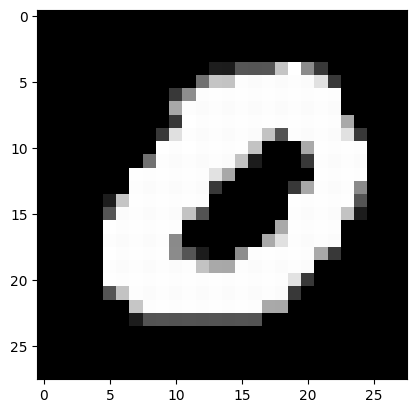

In [8]:
# Note: run this cell multiple times
index = np.random.randint(0, 60000)
sample_image = train_images_orig[index]

print("sample image shape: ", sample_image.shape)
print("sample image data type: ", type(sample_image))

print("=" * 100)
print("printing the numerical value of a sample image")
print(sample_image)

# aligning the pixel values in the output
print("=" * 100)
for row in sample_image:
  print("".join([str(elem).ljust(3) for elem in row]))

print("=" * 100)
plt.imshow(sample_image, cmap="gray")
plt.show()


In [9]:
len(train_labels)

60000

In [10]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
test_images_orig.shape

(10000, 28, 28)

In [12]:
len(test_labels)

10000

In [13]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### **Exercise 1:** Display the fourth image in the `test set` with its label.

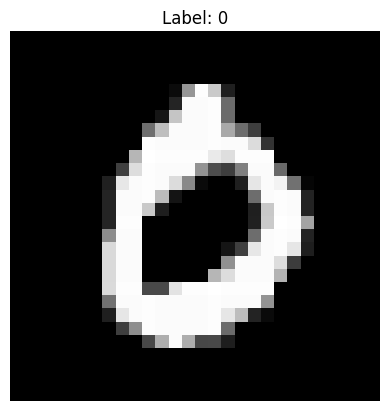

In [14]:
# Get the fourth image (index 3) and its label from the test set
fourth_image = test_images_orig[3]
fourth_label = test_labels[3]

# Display the image using matplotlib
plt.imshow(fourth_image, cmap='gray')
plt.title(f"Label: {fourth_label}")
plt.axis('off')  # Hide axes for cleaner visualization
plt.show()

# A first look at a neural network

## **Step 1:** The network architecture

In [15]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

<img src="https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/architecture.png" width="1000" height="400">

### **Input layer** - Preparing the image data

**Note: The nodes in the `Input layer` are not neurons. They are pixel values.**

In [16]:
train_images = train_images_orig.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images= test_images_orig.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

### **Exercise 2:** What is the shape of data after preprocessing

In [17]:
print("Training data shape:", train_images.shape)
print("Test data shape:", test_images.shape)

Training data shape: (60000, 784)
Test data shape: (10000, 784)


### Tensor reshaping

In [19]:
a = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
a.shape

(3, 2)

### **Exercise 3:** reshape the `a` matrix to 6 x 1 matrix.

In [20]:
reshaped_a = a.reshape(6, 1)

### **Hidden layer** with `relu` activation function

Each neuron in the hidden layer, as illustrated in the figure below, comprises two main components: the summation function and the activation function.

In our architecture, we have 512 neurons in the hidden layer.

<img src=https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/relu.webp with="500" height="300">

**The preferred activation function for hidden layers is `relu`. The mathematical function of ReLU is as follows:**

$$
relu(x) = max(0, x)
$$

> **Note: ReLU is considered as one of the biggest breakthroughs in deep learning because ReLU makes it possible to train a very deep neural network. It has solved the `vanishing gradient` challenge in `deep` networks with many hidden layers.**


### **Exercise 4** Write a function that takes a number/array `x` and returns `relu(x)`. Use the `np.maximum()` method in your function. Then, plot this function for x in the range of -5 to 5.

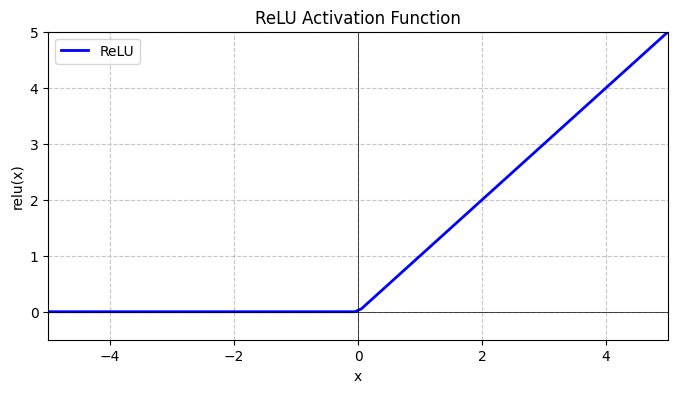

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

# Generate x values from -5 to 5
x = np.linspace(-5, 5, 100)
y = relu(x)

# Plot the ReLU function
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='ReLU', color='blue', linewidth=2)
plt.title('ReLU Activation Function')
plt.xlabel('x')
plt.ylabel('relu(x)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-5, 5)
plt.ylim(-0.5, 5)
plt.legend()
plt.show()

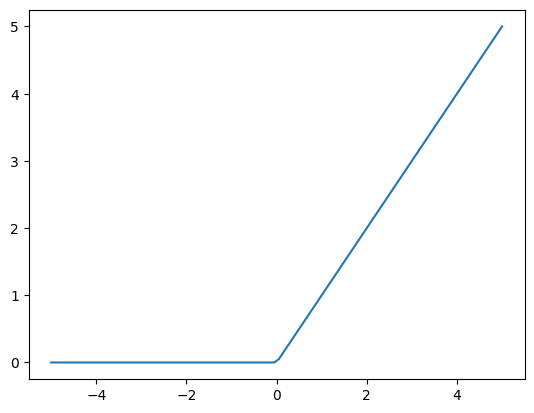

In [ ]:
# my solution output

### **Ecercise 5:** Suppose that I have 5 neurons in my hidden layer. After the summation stage, the result of this layer is `[-10, 5, 0, -2, 6]`. What is the result after passing this through the ReLU activation function?

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/pass-relu.png)

your answer here:

In [ ]:
Input:  [-10,   5,   0,  -2,   6]
Output: [  0,   5,   0,   0,   6]

Step-by-Step Explanation:

ReLU Rule:

If x > 0, return x

If x ≤ 0, return 0

Apply to Each Element:

-10 → 0 (negative)

5 → 5 (positive)

0 → 0 (non-negative threshold)

-2 → 0 (negative)

6 → 6 (positive)

Final Output: [0, 5, 0, 0, 6]

### **Output layer** - `Sigmoid` and `Softmax` activation function

Each neuron in the last layer of the neural network should output a number between 0 and 1 because each neuron represents the probability of the input belonging to a specific class.

**Important Note:** The values of the neurons in the last layer before applying the activation function are called `logits` or `scores`.

One way to achieve this is by using the sigmoid activation function.

The sigmoid function takes an input
`x` and outputs a number between 0 and 1.

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

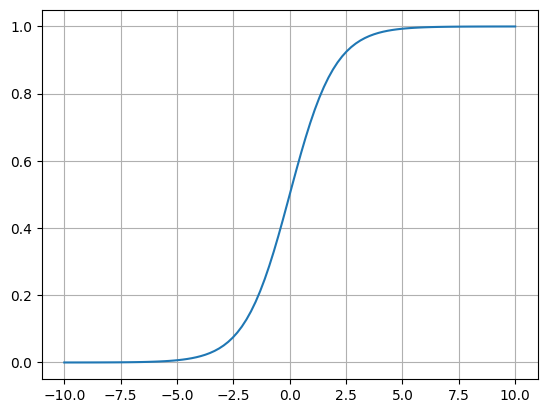

In [22]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y)
plt.grid()
plt.show()

### **Exercise 6:** Using the sigmoid function defined in the previous cell, suppose the last layer of a neural network has 4 neurons with the following values: [3.2, 1.3, 0.2, 0.8].
  - Apply the sigmoid function to these values to map them to numbers between 0 and 1.
  - Then, generate a bar plot of the scaled values.

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/pass-sigmoid.png)

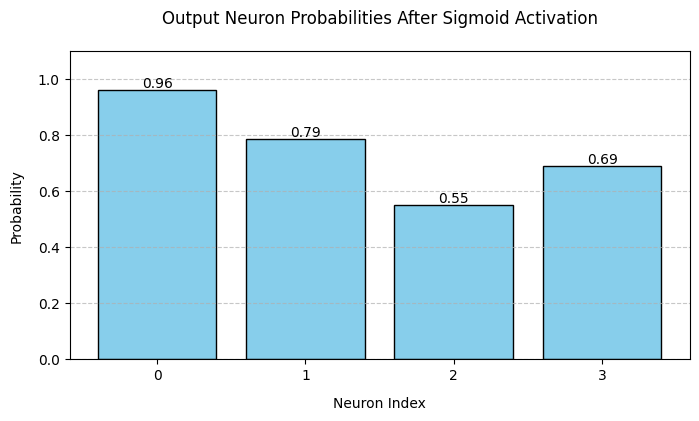

In [24]:
# Apply sigmoid activation to logits
logits = np.array([3.2, 1.3, 0.2, 0.8])
logits_scaled = sigmoid(logits)  # Using the previously defined sigmoid function

# Create bar plot
plt.figure(figsize=(8, 4))
bars = plt.bar(range(4), logits_scaled, color='skyblue', edgecolor='black')

# Customize plot
plt.title("Output Neuron Probabilities After Sigmoid Activation", pad=20)
plt.xlabel("Neuron Index", labelpad=10)
plt.ylabel("Probability", labelpad=10)
plt.xticks(np.arange(4))
plt.ylim(0, 1.1)  # Leave space for value labels

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

[0.96083428 0.78583498 0.549834   0.68997448]


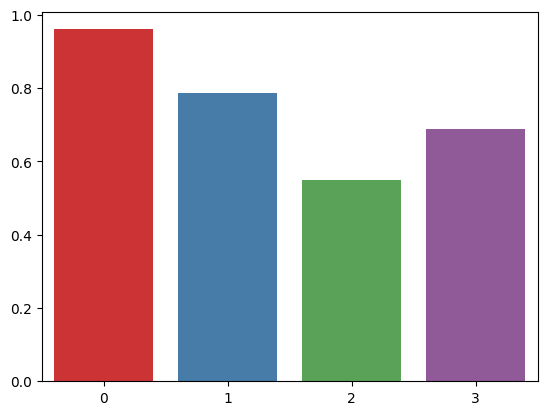

In [ ]:
#my solution output

This plot shows the probability distribution over labels. However, there is an issue here: with the sigmoid function, each output is independent and bounded between 0 and 1, but their sum is not constrained to equal 1. To address this, we use the softmax function, which normalizes the outputs so that they sum to 1, ensuring a valid probability distribution over the labels.


$$
\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^N e^{x_j}}
$$

In [25]:
def softmax(x):
  """
  input x is a vector representing the output of the last layer of a neural network
  """
  return np.exp(x)/sum(np.exp(x))

### **Exercise 7:** Pass the logits defined in Exercise 6 from the softmax function and plot the probability distribution over the labels.

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/pass-softmax.png)

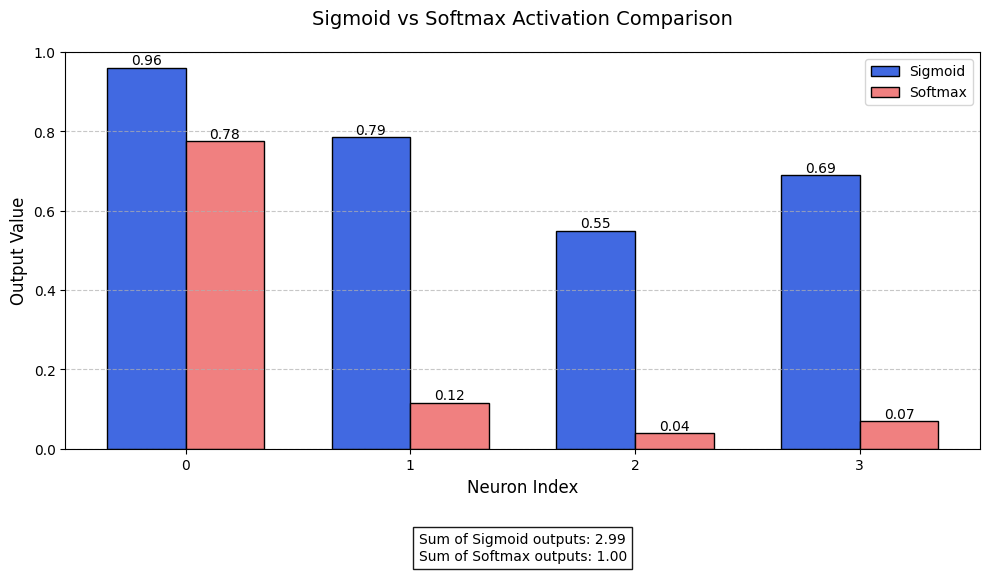

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

# Given logits
logits = np.array([3.2, 1.3, 0.2, 0.8])

# Apply both activation functions
sigmoid_output = sigmoid(logits)
softmax_output = softmax(logits)

# Create comparison plot
plt.figure(figsize=(10, 6))

# Set positions for bars
x = np.arange(len(logits))
width = 0.35

# Plot both outputs
rects1 = plt.bar(x - width/2, sigmoid_output, width, label='Sigmoid',
                color='royalblue', edgecolor='black')
rects2 = plt.bar(x + width/2, softmax_output, width, label='Softmax',
                color='lightcoral', edgecolor='black')

# Add labels and formatting
plt.title('Sigmoid vs Softmax Activation Comparison', fontsize=14, pad=20)
plt.xlabel('Neuron Index', fontsize=12)
plt.ylabel('Output Value', fontsize=12)
plt.xticks(x, labels=[0, 1, 2, 3])
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Add value labels
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

# Add important note about sum
plt.text(0.5, -0.25,
         f'Sum of Sigmoid outputs: {np.sum(sigmoid_output):.2f}\n'
         f'Sum of Softmax outputs: {np.sum(softmax_output):.2f}',
         ha='center', va='center', transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.9))

plt.tight_layout()
plt.show()

[0.77514955 0.11593805 0.03859242 0.07031998]
sum of all probs:  1.0000000000000002


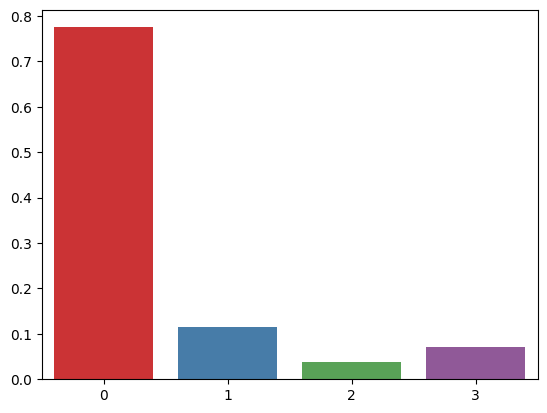

In [ ]:
#my solution output

### Exercise 8: Given the `probs` you calculated in the previous Exercise, find the predicted label using `np.argmax()` method.

In [28]:
probs = np.array([0.77514955, 0.11593805, 0.03859242, 0.07031998])
predicted_class = np.argmax(probs)

print("Predicted class:", predicted_class)

Predicted class: 0


> **To summarize so far, the input to the neural network is, for example, an image, and the output is the probability distribution over the labels.**

> **You can try [Google Teachable Machine](https://teachablemachine.withgoogle.com/train/image) to explore this concept further.**

<img src=https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/overal_logit-softmax.png height="650" width="650" >




In the next steps, we will train the neural network defined in step 1. By training the network, we optimize the weights between the neurons.

## **Step 2:** The compilation step

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

## **Step 3:** "Fitting" the model

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.8736 - loss: 0.4464
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9649 - loss: 0.1159
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9793 - loss: 0.0678
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9846 - loss: 0.0515
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9888 - loss: 0.0380


## **Step 4:** Using the model to make predictions

In [ ]:
test_digits = test_images[:3] #predictiong the label of test_image[0] , test_image[1], test_image[2]
predictions = model.predict(test_digits)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[5.3813039e-08, 8.8339903e-08, 1.4601770e-05, 6.6420631e-03,
        1.6605675e-11, 4.3978287e-07, 1.0941298e-11, 9.9332482e-01,
        2.3918119e-06, 1.5561984e-05],
       [6.4626519e-08, 4.8077818e-06, 9.9999309e-01, 1.1165381e-06,
        1.8537705e-13, 4.7513544e-07, 8.0789547e-08, 4.5650110e-13,
        2.0799199e-07, 9.8211294e-13],
       [8.9335833e-07, 9.9923730e-01, 1.3652080e-04, 1.5359572e-05,
        1.0737173e-04, 7.1584327e-06, 1.8019173e-05, 3.4408402e-04,
        1.3106359e-04, 2.1893347e-06]], dtype=float32)

### **Exercise 9:** Interpret the values in the `prediction`array.  

your answer here:

### See the result for the prediction of the first image

In [ ]:
print(predictions[0])
predicted_label = np.argmax(predictions[0])
print("Predicted label: ", predicted_label)

[5.3813039e-08 8.8339903e-08 1.4601770e-05 6.6420631e-03 1.6605675e-11
 4.3978287e-07 1.0941298e-11 9.9332482e-01 2.3918119e-06 1.5561984e-05]
Predicted label:  7


In [ ]:
print("highest prob: ", predictions[0][7])

highest prob:  0.9933248


In [ ]:
true_label = test_labels[0]
print("True label: ", true_label)

True label:  7


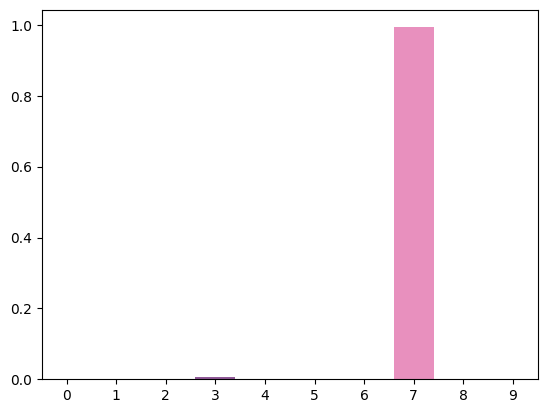

In [ ]:
# plt.bar(np.arange(10), predictions[0])
sns.barplot(x=np.arange(10), y=predictions[0], hue=np.arange(10), palette='Set1', legend=False)
plt.xticks(np.arange(10))
plt.show()

> **So, the output distribution of the model is very close to our ideal distribution, which is [0, 0, 0, 0, 0, 0, 0, 1, 0, 0].**



### **Exercise 10:** Predict the label of the fourth element of the test set.

**Important Note: Neural networks are designed to predict labels for a batch of data. For example, in the previous section, we predicted labels for a batch of four images, where the input shape was (4, 784). Similarly, when working with a single image, it must be fed into the network in the batch format with a shape of (1, 784).**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
Predicted probabilities: [0.03724464 0.09192684 0.09301268 0.08997403 0.04531046 0.15194583
 0.12179204 0.14149772 0.08994424 0.13735154]
Predicted label: 5
True label: 0


<ipython-input-29-6839da9e4f5f>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(10), y=prediction[0], palette="viridis")


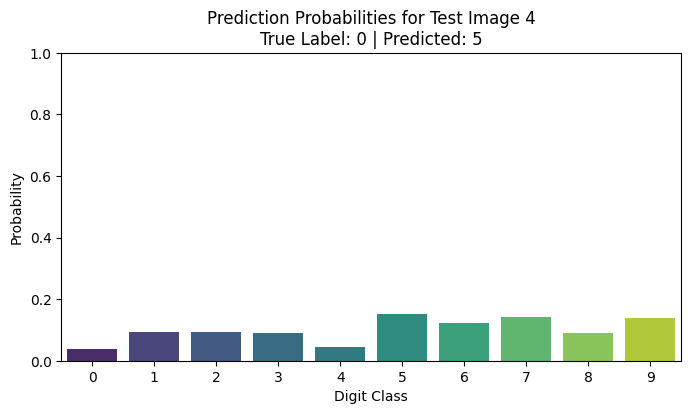

In [29]:
# Extract the fourth image and reshape it for batch prediction
fourth_image = test_images[3:4]  # Shape becomes (1, 784) for batch compatibility

# Make prediction
prediction = model.predict(fourth_image)

# Get predicted label
predicted_label = np.argmax(prediction)

# Get true label
true_label = test_labels[3]

# Print results
print("Predicted probabilities:", prediction[0])
print("Predicted label:", predicted_label)
print("True label:", true_label)

# Visualize probabilities
plt.figure(figsize=(8, 4))
sns.barplot(x=np.arange(10), y=prediction[0], palette="viridis")
plt.title(f"Prediction Probabilities for Test Image 4\nTrue Label: {true_label} | Predicted: {predicted_label}")
plt.xlabel("Digit Class")
plt.ylabel("Probability")
plt.xticks(np.arange(10))
plt.ylim(0, 1)
plt.show()

## **Step 5:** Evaluating the model on new data

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9776 - loss: 0.0736
test_acc: 0.9807999730110168


**Note:** We will discuss `optimizer`, `loss`, `epoch`, and `batch` in more depth in the coming weeks.